# Visualización del dataset

Ver https://github.com/SoccerNet/sn-tracking/blob/main/README.md

"The ground truth and detections are stored in comma-separate csv files with 10 columns (en realidad son .txt, altos villeros). These values correspond in order to: frame ID, track ID, top left coordinate of the bounding box, top y coordinate, width, height, confidence score for the detection (always 1. for the ground truth) and the remaining values are set to -1 as they are not used in our dataset, but are needed to comply with the MOT20 requirements"



In [16]:
import os
import random
from pathlib import Path
import configparser
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

In [17]:
SAMPLE = Path("samples/SNMOT-060")

In [20]:
for entry in sorted(SAMPLE.iterdir()):
    if entry.is_dir():
        child_names = sorted(child.name for child in entry.iterdir())
        print(f"{entry.name}/")
        preview = child_names[:5]
        for name in preview:
            print(f"  {name}")
        if len(child_names) > len(preview):
            print(f"  … ({len(child_names) - len(preview)} more)")
    else:
        print(entry.name)

det/
  det.txt
gameinfo.ini
gt/
  gt.txt
img1/
  000001.jpg
  000002.jpg
  000003.jpg
  000004.jpg
  000005.jpg
  … (745 more)
seqinfo.ini


In [21]:
seq_cfg = configparser.ConfigParser()
seq_cfg.read(SAMPLE / "seqinfo.ini")
seq_info = pd.DataFrame(seq_cfg["Sequence"].items(), columns=["key", "value"]).set_index("key")
print("Sequence metadata")
display(seq_info)

game_cfg = configparser.ConfigParser()
game_cfg.read(SAMPLE / "gameinfo.ini")
game_info = pd.DataFrame(game_cfg["Sequence"].items(), columns=["key", "value"]).set_index("key")
print("Game metadata")
display(game_info)

Sequence metadata


,value
key,
name,SNMOT-060
imdir,img1
framerate,25
seqlength,750
imwidth,1920
imheight,1080
imext,.jpg


Game metadata


,value
key,
name,SNMOT-060
gameid,4
actionposition,895
actionclass,Kick-off
visibility,visible
clipstart,0
gametimestart,1 - 00:00
clipstop,30000
gametimestop,1 - 00:30


In [ ]:
COLUMNS = [
    "frame","id","bb_left","bb_top","bb_width","bb_height","confidence","x","y","z"
 ]

det_path = SAMPLE / "det" / "det.txt"
gt_path = SAMPLE / "gt" / "gt.txt"

det_df = pd.read_csv(det_path, header=None, names=COLUMNS)
gt_df = pd.read_csv(gt_path, header=None, names=COLUMNS)


print(f"Detections: {len(det_df):,} boxes across {det_df['frame'].nunique()} frames")
print(f"Ground truth: {len(gt_df):,} boxes, {gt_df['id'].nunique()} unique track IDs")
display(det_df.head())
display(gt_df.head())

Detections: 13,540 boxes across 750 frames
Ground truth: 13,540 boxes, 26 unique track IDs


,frame,id,bb_left,bb_top,bb_width,bb_height,confidence,x,y,z
0,1,-1,914,855,55,172,1,-1,-1,-1
1,1,-1,917,575,32,122,1,-1,-1,-1
2,1,-1,956,557,53,133,1,-1,-1,-1
3,1,-1,1257,673,44,141,1,-1,-1,-1
4,1,-1,1888,400,30,101,1,-1,-1,-1


,frame,id,bb_left,bb_top,bb_width,bb_height,confidence,x,y,z
0,1,1,914,855,55,172,1,-1,-1,-1
1,2,1,907,855,67,172,1,-1,-1,-1
2,3,1,901,855,79,172,1,-1,-1,-1
3,4,1,894,854,92,173,1,-1,-1,-1
4,5,1,888,854,104,173,1,-1,-1,-1


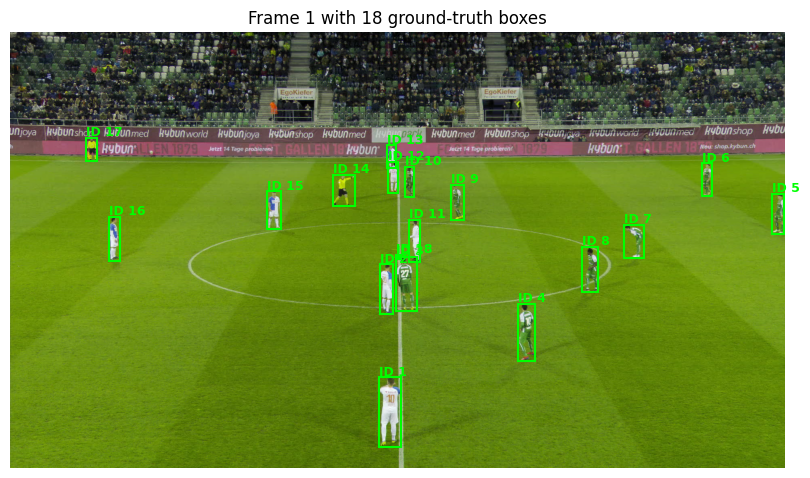

In [ ]:
frame_to_plot = 1

image_path = SAMPLE / "img1" / f"{frame_to_plot:06d}.jpg"
frame_boxes = gt_df[gt_df["frame"] == frame_to_plot]

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(plt.imread(image_path))
for _, box in frame_boxes.iterrows():
    rect = Rectangle(
        (box["bb_left"], box["bb_top"]),
        box["bb_width"],
        box["bb_height"],
        linewidth=1.5,
        edgecolor="lime",
        facecolor="none"
    )
    ax.add_patch(rect)
    ax.text(
        box["bb_left"],
        box["bb_top"] - 5,
        f"ID {int(box['id'])}",
        color="lime",
        fontsize=9,
        weight="bold"
    )
ax.set_title(f"Frame {frame_to_plot}")
ax.set_axis_off()
plt.show()